In [15]:
# write your code here
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.datasets import load_svmlight_file

In [16]:
def get_data(str):
    data = load_svmlight_file(str,123)
    return data[0], data[1]

#Import data
train = 'data\\a9a'
test = 'data\\a9a.t'
X_train, y_train = get_data(train)
X_test, y_test = get_data(test)


In [17]:
def selectData(X,Y,size):
    data = []
    per = np.random.permutation(X.shape[1])
    shuffled_X = X[:,per]
    shuffled_Y = Y[:,per]
    num_frag = math.floor(X.shape[1]/size)
    for i in range(num_frag):
        data_X = shuffled_X[:,i*size:(i+1)*size]
        data_Y = shuffled_Y[:,i*size:(i+1)*size]
        a = (data_X, data_Y)
        data.append(a)
    if X.shape[1] % size != 0:
        data_X = shuffled_X[:,num_frag*size:X.shape[1]]
        data_Y = shuffled_Y[:,num_frag*size:X.shape[1]]
        a = (data_X, data_Y)
        data.append(a)
    
    return data

In [18]:
def cost(W,b,X,Y):
    C = 5
    cost = np.sum(np.square(W))/2 + C*np.sum(np.maximum(0,1-Y*(np.dot(W.T,X)+b)))/X.shape[1]
    return cost

In [19]:
def loss(W,b,X,Y):
    C = 5
    GW = np.zeros(X.shape[1])
    Gb = 0
    filt = (1-Y*(np.dot(W.T,X)+b))>0
    GW = W - C*np.dot(Y*filt,X.T).T/X.shape[1]
    Gb = -C*np.sum(Y*filt*b)/X.shape[1]
    return GW,Gb


In [20]:
def main(X_train, y_train, X_test, y_test, method ,num):
    lenrate = 0.001
    n = 50
    validCost = []
    W = np.zeros((X_train.shape[0],1))
    b = 0
    vW = 0
    vb = 0
    r = 0.9
    decay_rate = 0.99
    cacheW = 0
    cacheb = 0
    eps = 1e-8
    mW = 0
    mb = 0
    beta1 = 0.9
    beta2 = 0.999
    rA = 0.95
    diffdireW = 0
    direW = 0
    diffdireb = 0
    direb = 0
    gW = 0
    gb = 0
    for i in range(n):
        datas = selectData(X_train, y_train, num)
        for data in datas:
            (X_sel, Y_sel) = data
            GW,Gb = loss(W,b,X_sel,Y_sel)
            if method is "NAG":
                v_prevW = vW
                vW = r*vW-lenrate*GW
                W += -r*v_prevW+(1+r)*vW
                v_prevb = vb
                vb = r*vb-lenrate*Gb
                b += -r*v_prevb+(1+r)*vb
            elif method is "RMSProp":
                cacheW = decay_rate * cacheW + (1 - decay_rate) * GW**2
                W += - lenrate * GW / (np.sqrt(cacheW) + eps)
                cacheb = decay_rate * cacheb + (1 - decay_rate) * Gb**2
                b += - lenrate * Gb / (np.sqrt(cacheb) + eps)
            elif method is "Adam":
                t = i + 1
                mW = beta1*mW + (1-beta1)*GW
                mtW = mW / (1-beta1**t)
                vW = beta2*vW + (1-beta2)*(GW**2)
                vtW = vW / (1-beta2**t)
                W += - lenrate * mtW / (np.sqrt(vtW) + eps)
                mb = beta1*mb + (1-beta1)*Gb
                mtb = mb / (1-beta1**t)
                vb = beta2*vb + (1-beta2)*(Gb**2)
                vtb = vb / (1-beta2**t)
                b += - lenrate * mtb / (np.sqrt(vtb) + eps)
            elif method is "AdaDelta":
                gW = rA*gW+(1-rA)*GW**2
                diffdireW = -np.sqrt(direW+eps)/np.sqrt(gW+eps)*GW
                W += diffdireW
                direW = rA*direW+(1-rA)*diffdireW**2
                gb = rA*gb+(1-rA)*Gb**2
                diffdireb = -np.sqrt(direb+eps)/np.sqrt(gb+eps)*Gb
                b += diffdireb
                direb = rA*direb+(1-rA)*diffdireb**2
        validcost = cost(W,b,X_test,y_test)
        validCost.append(validcost)
    return validCost

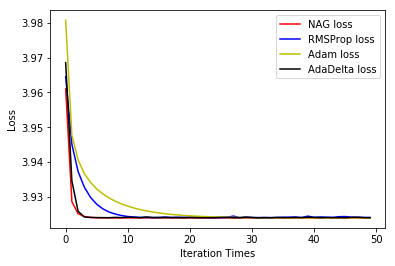

In [21]:
X_train = X_train.T.toarray()
X_test = X_test.T.toarray()
y_train = np.reshape(y_train,(1,y_train.shape[0]))
y_test = np.reshape(y_test,(1,y_test.shape[0]))
y_train[y_train<0]=0
y_test[y_test<0]=0
n=50
NAGvaild = main(X_train,y_train,X_test,y_test,method = 'NAG',num = 800)
RMSvaild = main(X_train,y_train,X_test,y_test,method = 'RMSProp',num = 1500)
Adamvaild = main(X_train,y_train,X_test,y_test,method = 'Adam',num = 800)
AdaDeltavaild = main(X_train,y_train,X_test,y_test,method = 'AdaDelta',num = 200)
plt.figure(1)
x = np.arange(0, n, 1)
plt.xlabel('Iteration Times')
plt.ylabel('Loss')
plt.plot(x,NAGvaild,color="r",label = "NAG loss")
plt.plot(x,RMSvaild,color="b",label = "RMSProp loss")
plt.plot(x,Adamvaild,color="y",label = "Adam loss")
plt.plot(x,AdaDeltavaild,color="k",label = "AdaDelta loss")
plt.legend(loc='upper right')
plt.show()
